In [23]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import requests
import sys, os, random
import tensorflow as tf
import datetime, os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
import logging
import io
from tensorflow import keras
from sklearn import metrics
#from tensorboard.plugins.hparams import api as hp
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Conv1D, Conv2D, Flatten, Reshape, MaxPooling1D, MaxPooling2D, \
    BatchNormalization
from tensorflow.keras.optimizers import Adam
#from tensorboard.plugins.hparams import api as hp
import os
import glob
import shutil
import tensorflow as tf
import tensorflow_io as tfio
from IPython.display import Audio


In [24]:
from datetime import datetime

DATA_FOLDER = "./data"
CLIPS_FOLDER = os.path.join(DATA_FOLDER, "clips")
TRAIN_TSV = os.path.join(DATA_FOLDER,"train.tsv")
TEST_TSV = os.path.join(DATA_FOLDER,"test.tsv")

SOURCE_FILE = TEST_TSV
TARGET_PATH = os.path.join(DATA_FOLDER,"test")

RESULT_SET = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "0","j","n"]
WAVE_FILE=os.path.join(DATA_FOLDER,"8.v6_15_14_NO_CHANGE_20210217_222522_46Glw.wav")
FEATURE_FILE=os.path.join(DATA_FOLDER,"8_features.txt")

In [25]:
w=np.genfromtxt(FEATURE_FILE,delimiter=',')
print(w)

[-1.8829 -0.6777  0.8664  1.9292 -0.5642 -1.7966 -0.9565 -1.6948  0.161
  1.0628 -0.9404 -1.5076  1.6313  0.7482  2.1693  0.1436 -0.4469 -2.002
 -1.7013 -0.8026  0.4009  0.7592 -0.7143  0.19    0.1494 -0.1993 -0.5541
  0.9138  0.4593 -0.0128  0.5211  0.3563 -0.5694  0.7797  0.4526 -0.6154
  0.6315 -0.2143 -1.644  -0.45   -0.5541  1.3815 -0.2246  1.4832 -0.3676
 -0.6696 -0.6218  0.5775 -0.0359 -0.7774 -1.8992 -0.9067 -1.642  -0.2378
  0.5096 -0.1175 -1.5539 -1.1368 -1.8727 -0.7334 -0.0992  1.145   0.4412
 -0.2912 -0.3583 -0.8808 -2.0378 -0.0197  0.1357  0.4232 -0.8784  0.0864
  0.2857 -0.2615 -1.3394 -0.182  -0.9263  0.231  -1.7316 -0.0082 -1.0905
 -1.0639  0.9544 -0.9723  0.0757  0.2321 -0.1188 -0.066   0.0136 -0.2178
  0.2627 -0.1391 -1.5961 -2.3494 -0.3405  0.0951  0.4448  0.6766 -0.2169
  0.338   1.4616 -0.8406 -0.6986  0.8213 -0.7334  1.1025 -0.2551  0.5753
  0.3439  0.3894 -1.306  -1.2181  0.2426 -0.8285 -0.5915  0.6194 -0.4593
 -0.4182  0.9726  0.6794 -0.6396 -0.5596  0.2694  1.7

In [26]:

audio = tfio.audio.AudioIOTensor(WAVE_FILE)
audio_slice = audio[700:]
audio_tensor = tf.squeeze(audio_slice, axis=[-1])
print(audio_tensor)

tf.Tensor([-112 -112  -80 ...   48   48   48], shape=(10500,), dtype=int16)


In [27]:
from IPython.display import Audio

Audio(audio_tensor.numpy(), rate=audio.rate.numpy())

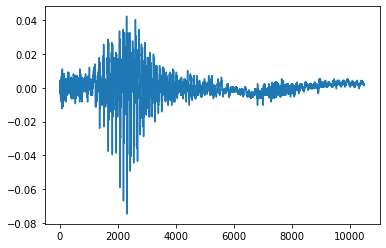

In [28]:
import matplotlib.pyplot as plt


tensor = tf.cast(audio_tensor, tf.float32) / 32768.0

plt.figure()
plt.plot(tensor.numpy())

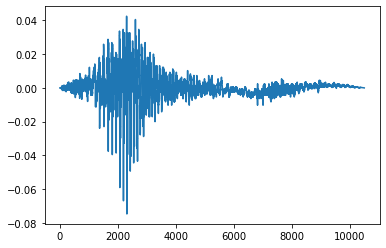

In [29]:
fade = tfio.experimental.audio.fade(
    tensor, fade_in=1000, fade_out=2000, mode="logarithmic")

plt.figure()
plt.plot(fade.numpy())


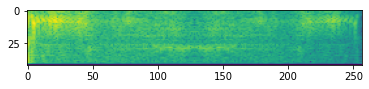

In [32]:
# Convert to spectrogram
spectrogram = tfio.experimental.audio.spectrogram(tensor, nfft=512, window=512, stride=256)

plt.figure()
plt.imshow(tf.math.log(spectrogram).numpy())

In [33]:
print(spectrogram)

tfio.__version__

KeyboardInterrupt: 